# Visualizing events in a CSGO demo
##### Last Updated: October 31, 2022

We will be using the `de_dust2` demo from [this match](https://www.hltv.org/matches/2344822/og-vs-natus-vincere-blast-premier-fall-series-2020) between OG and NAVI. We will discuss the basic visualization capabilities of awpy. First, we must parse our demo.

In [1]:
from awpy.parser import DemoParser

p = DemoParser(demofile="og-vs-natus-vincere-m1-dust2.dem", parse_rate=64)

d = p.parse()

The base plotting function is `plot_map`, where we pass a map name, and either `type="original"` for the original map images, or `map_type="simpleradar"` for the SimpleRadar images. If using SimpleRadar, `dark=True` will set the map to use the dark theme.

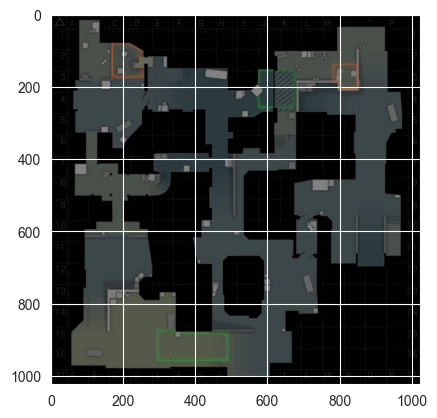

In [2]:
import matplotlib.pyplot as plt
from awpy.visualization.plot import plot_map

f, a = plot_map(map_name="de_dust2", map_type="original")
plt.show()

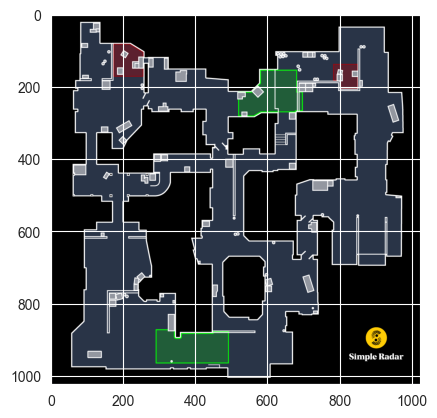

In [3]:
f, a = plot_map(map_name="de_dust2", map_type="simpleradar", dark=False)
plt.show()

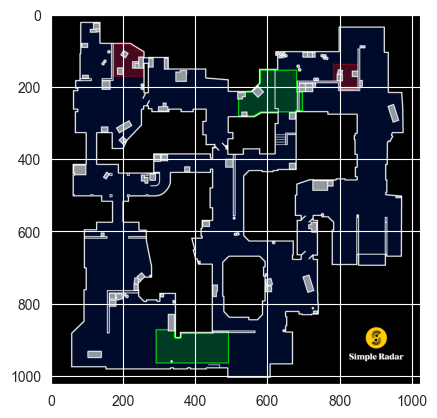

In [4]:
f, a = plot_map(map_name="de_dust2", map_type="simpleradar", dark=True)
plt.show()

There are two main functions, `plot_round()` and `plot_nades()`. The former will create a gif of player movements. The latter will plot the grenades. Below, we show them both in action. 

`plot_round()` can take a while to run. Basically, it creates all of the images, then combines them into the gif. The function will return `True`, or error out. When it finishes running, look for `best_round_ever.gif`.

In [5]:
from awpy.visualization.plot import plot_round

plot_round("best_round_ever.gif", d["gameRounds"][7]["frames"], map_name=d["mapName"], map_type="simpleradar", dark=False)

240it [01:05,  3.65it/s]


True

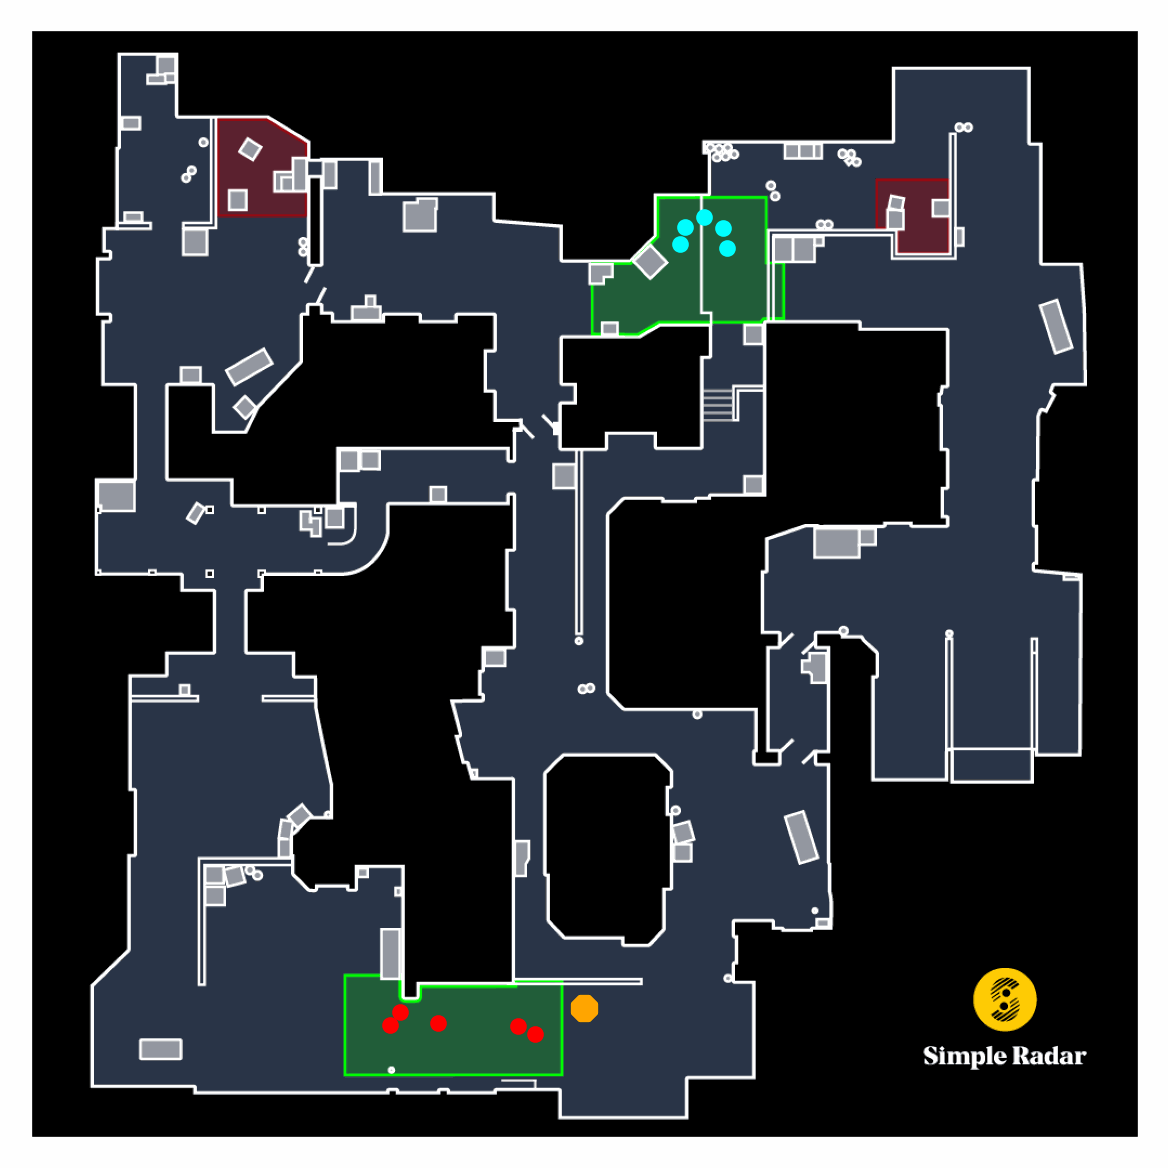

In [6]:
from IPython.display import Image
Image(filename="best_round_ever.gif") 

Next we can plot grenade throws using `plot_nades`. We have to pass a list of rounds, what grenades we are interested in plotting, what side we wish to plot, and then the regular plotting args, like map and map type

(<Figure size 640x480 with 1 Axes>, <Axes: >)

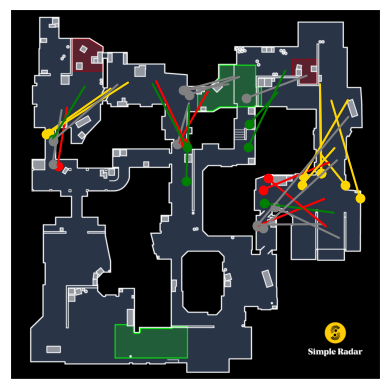

In [7]:
from awpy.visualization.plot import plot_nades

plot_nades(rounds=d["gameRounds"][7:10], nades=["Flashbang", "HE Grenade", "Smoke Grenade", "Molotov", "Incendiary Grenade"], side="CT", map_name="de_dust2", map_type="simpleradar", dark=False)